### Om pydeck en qgrid te activeren vanuit cmd en met admin rechten:
jupyter nbextension install --sys-prefix --symlink --overwrite --py pydeck

jupyter nbextension enable --sys-prefix --py pydeck

jupyter nbextension enable --py --sys-prefix qgrid

jupyter nbextension enable --py --sys-prefix widgetsnbextension

En dan jupyter notebook vanuit zelfde cmd sessie starten met jupyter notebook


In [1]:
import pydeck as pdk
from pydeck import Deck, Layer, ViewState
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display
import ipywidgets
import time
import datetime

import qgrid

In [2]:
# path to Data folder
DATA = '../data'

# path to Models folder
MODELS = '../models'

# path to Notebooks folder
NOTEBOOKS = '../notebooks'

In [3]:
# set mapbox key
os.environ["MAPBOX_API_KEY"] = 'pk.eyJ1IjoibWFyY2Vsa29vbHdpamsiLCJhIjoiY2trYmJqMWdrMDV2ZzJ3cGFxcTB2b2Y0YSJ9.MwGGloXOVwW4QUViVsa02A'

In [4]:
# change seaborn figure size
sns.set(rc={"figure.figsize": (12, 8)})

In [5]:
# read meerdere files voor meerdere jaren
files = ['Enexis_kleinverbruiksgegevens_01012010.csv',
         'Enexis_kleinverbruiksgegevens_01012011.csv',
         'Enexis_kleinverbruiksgegevens_01012012.csv',
         'Enexis_kleinverbruiksgegevens_01012013.csv',
         'Enexis_kleinverbruiksgegevens_01012014.csv',
         'Enexis_kleinverbruiksgegevens_01012015.csv',
         'Enexis_kleinverbruiksgegevens_01012016.csv',
         'Enexis_kleinverbruiksgegevens_01012017.csv',
         'Enexis_kleinverbruiksgegevens_01012018.csv',
         'Enexis_kleinverbruiksgegevens_01012019.csv',
         'Enexis_kleinverbruiksgegevens_01012020.csv'
        ]

In [6]:
df = pd.DataFrame()
for j in files:
    print(j)
    appenddata = pd.read_csv(os.path.join(DATA, j), sep=';', thousands='.', decimal=',',  encoding= 'unicode_escape')
    #appenddata['DATE'] = pd.to_datetime(j[-12:-4], format='%d%m%Y', errors='ignore')
    appenddata['YEAR'] = j[-8:-4]
    df = df.append(appenddata,ignore_index=True)

Enexis_kleinverbruiksgegevens_01012010.csv
Enexis_kleinverbruiksgegevens_01012011.csv
Enexis_kleinverbruiksgegevens_01012012.csv
Enexis_kleinverbruiksgegevens_01012013.csv
Enexis_kleinverbruiksgegevens_01012014.csv
Enexis_kleinverbruiksgegevens_01012015.csv
Enexis_kleinverbruiksgegevens_01012016.csv
Enexis_kleinverbruiksgegevens_01012017.csv
Enexis_kleinverbruiksgegevens_01012018.csv
Enexis_kleinverbruiksgegevens_01012019.csv
Enexis_kleinverbruiksgegevens_01012020.csv


In [7]:
df.head()

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,YEAR
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100.0,16,100,NaN,NaN,4282.0,25.0,0.0,2010
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100.0,11,100,NaN,NaN,5113.0,10.0,0.0,2010
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100.0,30,100,NaN,NaN,4809.0,34.0,0.0,2010
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100.0,21,100,NaN,NaN,5015.0,44.0,0.0,2010
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100.0,12,100,NaN,NaN,3074.0,22.0,0.0,2010


In [8]:
# filter op elektriciteit
df = df[df['PRODUCTSOORT'] == 'ELK']

In [9]:
# numerieke deel van de postcode
df['PC4'] = df['POSTCODE_VAN'].astype(str).str[0:4]

In [10]:
df['SJV_TOTAAL'] = round(df['AANSLUITINGEN_AANTAL'] * df['SJV_GEMIDDELD'] / 1000) # delen door 1000 om MW ipv KW te krijgen

In [11]:
df.head(5)

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,YEAR,PC4,SJV_TOTAAL
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100.0,16,100,NaN,NaN,4282.0,25.0,0.0,2010,4251,69.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100.0,11,100,NaN,NaN,5113.0,10.0,0.0,2010,4251,56.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100.0,30,100,NaN,NaN,4809.0,34.0,0.0,2010,4251,144.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100.0,21,100,NaN,NaN,5015.0,44.0,0.0,2010,4251,105.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100.0,12,100,NaN,NaN,3074.0,22.0,0.0,2010,4251,37.0


In [12]:
# group by pc4
#df_pc = df.groupby(['PC4','DATE'], as_index=False)['SJV_GEMIDDELD'].mean()
df_pc = df.groupby(['PC4','YEAR'], as_index=False)['SJV_TOTAAL'].sum()

In [13]:
df_pc['PC4']=df_pc['PC4'].astype(int)

In [14]:
df_pc.head()

,PC4,YEAR,SJV_TOTAAL
0,4251,2010,21882.0
1,4251,2011,23084.0
2,4251,2012,24006.0
3,4251,2013,23728.0
4,4251,2014,23623.0


In [15]:
#postcode tabel inlezen
file2 = ('postcode4.csv')
df_postcode = pd.read_csv(os.path.join(DATA, file2), sep=',', thousands=None, decimal='.',index_col='id')

In [16]:
df_postcode.head()

,postcode,woonplaats,alternatieve_schrijfwijzen,gemeente,provincie,netnummer,latitude,longitude,soort
id,,,,,,,,,
1,1000,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.336243,4.869444,Postbus
2,1001,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.364240,4.883358,Postbus
3,1002,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.364240,4.883358,Onbekend
4,1003,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.364240,4.883358,Onbekend
5,1005,Amsterdam,NaN,Amsterdam,Noord-Holland,20,52.364240,4.883358,Postbus


In [17]:
df_postcode = df_postcode[['postcode','latitude','longitude']]

In [18]:
df_postcode.rename(columns = {'postcode': 'PC4', 'latitude': 'LATITUDE', 'longitude': 'LONGITUDE'}, inplace = True)

In [19]:
df_total = pd.merge(df_pc, df_postcode, on='PC4',how='left', suffixes=('', '_H'))

In [20]:
df_total.head()

,PC4,YEAR,SJV_TOTAAL,LATITUDE,LONGITUDE
0,4251,2010,21882.0,51.808165,4.891848
1,4251,2011,23084.0,51.808165,4.891848
2,4251,2012,24006.0,51.808165,4.891848
3,4251,2013,23728.0,51.808165,4.891848
4,4251,2014,23623.0,51.808165,4.891848


In [21]:
# CHECK: niet alle postcodes komen in de postcode tabel voor
# VOOR NU DROPNA
df_total.dropna(inplace=True)

In [22]:
#year = pd.to_datetime('01012010' , format='%d%m%Y', errors='ignore')
year = '2020'

In [23]:
#https://pydeck.gl/deck.html
#https://hub.gke2.mybinder.org/user/uber-deck.gl-wh3i2ltb/tree

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df_total[df_total['YEAR'] == year],
    pickable=True,
    opacity=0.8,
    stroked=False,  #lines
    filled=True,
    radius_scale=10,
    radius_min_pixels=2,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=['LONGITUDE','LATITUDE'],
    get_radius='SJV_TOTAAL/150', #50, #"exits_radius",  # Radius is given in meters
    get_fill_color='[255, 220-SJV_TOTAAL/100, 0]' ,  #'[255, SJV_TOTAAL/100, 255]'  255 is geel, 0 is rood
    get_line_color=[0, 0, 0]
)

# Set the viewport location
view_state = pdk.ViewState(
    latitude=52, 
    longitude=6, 
    zoom=6, 
    bearing=0, 
    pitch=0
)

# Render
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    map_style='mapbox://styles/mapbox/dark-v9',
    tooltip= {"text": "Jaarverbuik: {SJV_TOTAAL} MW\nJaar: {YEAR}\nPostcodegebied: {PC4}"}
)

#to_html(filename=None, open_browser=False, notebook_display=None, iframe_width='100%', iframe_height=500, as_string=False, offline=False, **kwargs)
r.to_html(
    filename="scatterplot_layer.html",
    open_browser=True,
    notebook_display=None,
    iframe_width='100%',
    #iframe_height=500,
    #as_string=False, 
    #offline=False
)

# Create an HTML header to display the year
display_el = ipywidgets.HTML('<h1>{}</h1>'.format(year))
display(display_el)

r.show()

HTML(value='<h1>2020</h1>')

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"bearing": 0, "latitude": 52, "longitude"…

In [24]:
#https://pydeck.gl/jupyter.html
#https://hub.gke2.mybinder.org/user/uber-deck.gl-wh3i2ltb/notebooks/02%20-%20Scatterplots.ipynb
for y in range(2010, 2021):
    layer.data = df_total[df_total['YEAR'] == str(y)]
    # Reset the header to display the year
    display_el.value = '<h1>Jaarverbruik in {}</h1>'.format(y)
    r.update()
    time.sleep(1)

In [29]:
pd.DataFrame(r.selected_data)

""


In [25]:
# andere layer: ColumnLayer
#https://pydeck.gl/deck.html
#https://hub.gke2.mybinder.org/user/uber-deck.gl-wh3i2ltb/tree

# Define a layer to display on a map
layer = pdk.Layer(
    "ColumnLayer", #"HexagonLayer",
    df_total[df_total['YEAR'] == year],
    get_position=['LONGITUDE','LATITUDE'],
    get_elevation='SJV_TOTAAL',
    elevation_scale=1,
    radius=500,
    get_fill_color='[255, 220-SJV_TOTAAL/100, 0]',
    auto_highlight=True,
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    latitude=52, 
    longitude=6, 
    zoom=6, 
    bearing=0, 
    pitch=30
)

# Render
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    map_style='mapbox://styles/mapbox/dark-v9',    #map_style=pdk.map_styles.SATELLITE
    tooltip={"text": "Jaarverbuik: {SJV_TOTAAL} MW\nJaar: {YEAR}\nPostcodegebied: {PC4}"}
)

#to_html(filename=None, open_browser=False, notebook_display=None, iframe_width='100%', iframe_height=500, as_string=False, offline=False, **kwargs)
r.to_html(
    "column_layer.html",
    open_browser=True,
    notebook_display=None,
    iframe_width='100%'
)

# Create an HTML header to display the year
display_el = ipywidgets.HTML('<h1>Jaarverbruik in {}</h1>'.format(year))
display(display_el)

r.show()

HTML(value='<h1>Jaarverbruik in 2020</h1>')

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"bearing": 0, "latitude": 52, "longitude"…

In [26]:
for y in range(2010, 2021):
    layer.data = df_total[df_total['YEAR'] == str(y)]
    # Reset the header to display the year
    display_el.value = '<h1>Jaarverbruik in {}</h1>'.format(y)
    r.update()
    time.sleep(0.5)

In [27]:
df_total['SJV_TOTAAL']

0        21882.0
1        23084.0
2        24006.0
3        23728.0
4        23623.0
          ...   
17125       56.0
17126       53.0
17127      174.0
17128      163.0
17129      155.0
Name: SJV_TOTAAL, Length: 17016, dtype: float64

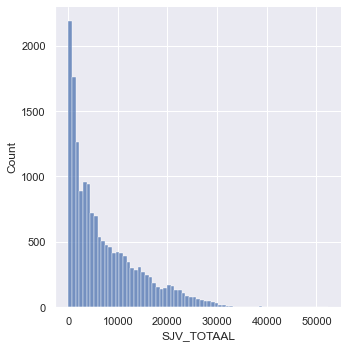

In [28]:
# change seaborn figure size
#sns.set(rc={"figure.figsize": (30, 20)})
#plt.figure(figsize=(50, 50))

sns.displot(df_total, x='SJV_TOTAAL')

(1.0, 10000.0)

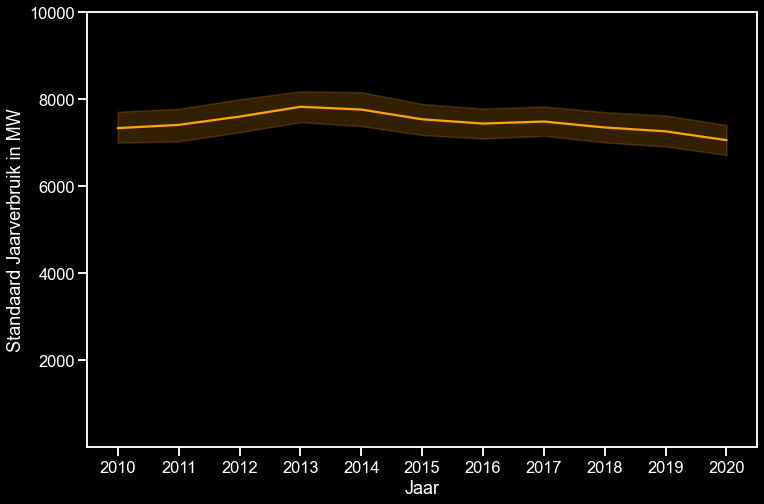

In [29]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
ax = sns.lineplot(data=df_total, x="YEAR", y="SJV_TOTAAL", color='orange')
ax.set(xlabel="Jaar", ylabel = "Standaard Jaarverbruik in MW")
plt.ylim(1, 10000) # set Y as

In [35]:
#https://towardsdatascience.com/two-essential-pandas-add-ons-499c1c9b65de
#https://github.com/quantopian/qgrid
#to show a df simply use the below:
# Jaren in aparte kolommen weergeven
# Postocde als index
# Postcode als string
# wellicht ook plaatsnaam nog toevoegen
qgrid.show_grid(df_total)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [30]:
# netwerk laden
files=['IMKL-Kast_Aansluitkast_Elek_Zuid_ligging.csv'
      ,'IMKL-Kast_Aansluitkast_Elek_Noord_ligging.csv']

df = pd.DataFrame()
for j in files:
    print(j)
    appenddata = pd.read_csv(os.path.join(DATA, j), sep=';', thousands='.', decimal=',',  encoding= 'unicode_escape')
    df = df.append(appenddata,ignore_index=True)

IMKL-Kast_Aansluitkast_Elek_Zuid_ligging.csv
IMKL-Kast_Aansluitkast_Elek_Noord_ligging.csv


In [31]:
df[['LATITUDE','LONGITUDE']] = df['WKT'].str.slice(7, -1).str.split(' ', expand=True)
df['LATITUDE'] = pd.to_numeric(df['LATITUDE']) #, downcast="float")
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])
df['VALIDFROM'] = pd.to_datetime(df['VALIDFROM'], format='%Y-%m-%d %H:%M:%S', errors='ignore')

In [32]:
df.head()

,WKT,CURRENTSTA,VALIDFROM,VERTICALPO,SOURCEREFE,OMSCHRIJVI,CONTAINERL,BOVENGROND,GEONAUWKEU,ROTATIEHOE,ROTATIE_01,INNETWORK,EXTRAGEOME,LATITUDE,LONGITUDE
0,POINT (51.3581526207256 5.42990093960942),functional,2012-01-24,onGroundSurface,!general!aansluitkast_elek_kast!83235022443236...,Aansluitkast,kast,True,tot100cm,0,deg,laagspanning,0102000020407100000600000054E3A59BB1480341B29D...,51.358153,5.429901
1,POINT (51.6919228670036 5.30828309883926),functional,2012-01-26,onGroundSurface,!general!aansluitkast_elek_kast!83235022443236...,Aansluitkast,kast,True,tot100cm,0,deg,laagspanning,01020000204071000005000000355EBA493A410241EC51...,51.691923,5.308283
2,POINT (51.6936186453334 5.25664329300984),functional,2012-01-31,onGroundSurface,!general!aansluitkast_elek_kast!83235022443236...,Aansluitkast,kast,True,tot100cm,0,deg,laagspanning,01020000204071000005000000DF4F8D97A8D101415839...,51.693619,5.256643
3,POINT (51.5118682066469 4.28144204808226),functional,2011-12-06,onGroundSurface,!general!aansluitkast_elek_kast!83235022443238...,Aansluitkast,kast,True,tot100cm,0,deg,laagspanning,010200002040710000050000005839B4C81E1AF3408195...,51.511868,4.281442
4,POINT (51.5543755068093 5.6824100686681),functional,2011-12-06,onGroundSurface,!general!aansluitkast_elek_kast!83235022443236...,Aansluitkast,kast,True,tot100cm,0,deg,laagspanning,0102000020407100000500000014AE47E18D6B054121B0...,51.554376,5.682410


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68775 entries, 0 to 68774
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   WKT         68775 non-null  object        
 1   CURRENTSTA  68775 non-null  object        
 2   VALIDFROM   68775 non-null  datetime64[ns]
 3   VERTICALPO  68775 non-null  object        
 4   SOURCEREFE  68775 non-null  object        
 5   OMSCHRIJVI  68775 non-null  object        
 6   CONTAINERL  68775 non-null  object        
 7   BOVENGROND  68775 non-null  bool          
 8   GEONAUWKEU  68775 non-null  object        
 9   ROTATIEHOE  68775 non-null  int64         
 10  ROTATIE_01  68775 non-null  object        
 11  INNETWORK   68775 non-null  object        
 12  EXTRAGEOME  68775 non-null  object        
 13  LATITUDE    68775 non-null  float64       
 14  LONGITUDE   68775 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(10)
memory

In [34]:
df['VALIDFROM'].min()

Timestamp('1995-08-07 00:00:00')

In [35]:
valid_from_date =  pd.to_datetime('01011995' , format='%d%m%Y', errors='ignore')

In [36]:
# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df[['LATITUDE','LONGITUDE','INNETWORK','OMSCHRIJVI']],
    pickable=True,
    opacity=0.8,
    stroked=False,  #lines
    filled=True,
    radius_scale=10,
    radius_min_pixels=2,
    radius_max_pixels=10,
    line_width_min_pixels=1,
    get_position=['LONGITUDE','LATITUDE'],
    get_radius=10, #"exits_radius",  # Radius is given in meters
    get_fill_color='[255, 255, 0]' ,  #'[255, SJV_TOTAAL/100, 255]'  255 is geel, 0 is rood
    get_line_color=[0, 0, 0]
)

# Set the viewport location
view_state = pdk.ViewState(
    latitude=52, 
    longitude=6, 
    zoom=6, 
    bearing=0, 
    pitch=0
)

# Render
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    map_style=pdk.map_styles.SATELLITE,  #map_style='mapbox://styles/mapbox/dark-v9',
    tooltip= {"text": "In netwerk: {INNETWORK}\nOmschrijving: {OMSCHRIJVI}"}
)

#to_html(filename=None, open_browser=False, notebook_display=None, iframe_width='100%', iframe_height=500, as_string=False, offline=False, **kwargs)
r.to_html(
    filename="scatterplot_nw_layer.html",
    open_browser=True,
    notebook_display=None,
    iframe_width='100%',
    #iframe_height=500,
    #as_string=False, 
    #offline=False
)

# Create an HTML header to display the year
display_el = ipywidgets.HTML('<h1>{}</h1>'.format(year))
display(display_el)

r.show()

HTML(value='<h1>2020</h1>')

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"bearing": 0, "latitude": 52, "longitude"…